# Dynamight: Evolutionary game dynamics in Python and Sagemath

In this notebook, I define functions for plotting vector fields of the replicator dynamics in 2 dimensions

In [6]:
%display typeset

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


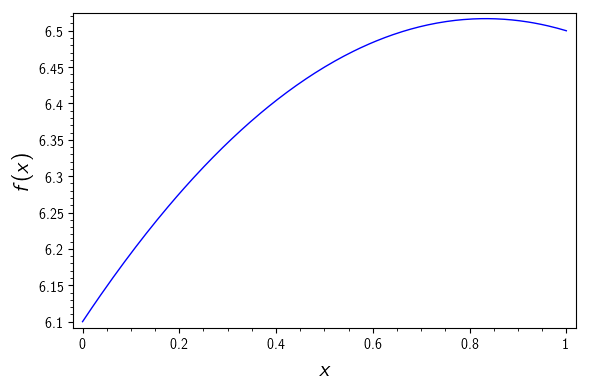

In [67]:
ft(x,R,S,T,P) = x*(x*R+(1-x)*S) + (1-x)*(x*T+(1-x)*P);

from matplotlib import rc, rcParams
rc('text',usetex=True)
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       #r'\usepackage{fouriernc}',
       #r'\usepackage{times}',
       #r'\usepackage[defaultsans]{lato}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\renewcommand\familydefault{\sfdefault}',
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       #r'\footnotesize'
]
#rc('font',**{'family':'serif','serif':['fouriernc']})
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern']})
cR=6.5
cS=6.2
cT=7
cP=6.1
favg = plot(ft(x,cR,cS,cT,cP),x,0,1,frame=True,axes=False,xmin=0.5,xmax=1,axes_labels=["$x$","$f(x)$"]);
show(favg)
#save(favg,"fitAvg.pdf")

## New arrow style

In [8]:
var('x_B,x_C,y_B,y_C,x_F,y_F,x_A,y_A,s,a,c,r,i_m,i_p')
#solve_ineq([(y_A-y_B)/(x_A-x_B)==s,x_A-x_B==1],y_B)

#i_m = -s*x_A+y_A

solF = solve([(y_A-y_F)/(x_A-x_F)==s,(y_A-y_F)^2+(x_A-x_F)^2==a^2],x_F,y_F)
solF

#i_p = (1/s)*x_F+y_F

[[x_F == ((s^2 + 1)*x_A - sqrt(s^2 + 1)*a)/(s^2 + 1), y_F == -(sqrt(s^2 + 1)*a*s - (s^2 + 1)*y_A)/(s^2 + 1)], [x_F == ((s^2 + 1)*x_A + sqrt(s^2 + 1)*a)/(s^2 + 1), y_F == (sqrt(s^2 + 1)*a*s + (s^2 + 1)*y_A)/(s^2 + 1)]]

In [9]:
solB = solve([(y_F-y_B)/(x_F-x_B)==s,(y_B-y_F)^2+(x_B-x_F)^2==c^2],x_B,y_B)
solB

[[x_B == ((s^2 + 1)*x_F - sqrt(s^2 + 1)*c)/(s^2 + 1), y_B == -(sqrt(s^2 + 1)*c*s - (s^2 + 1)*y_F)/(s^2 + 1)], [x_B == ((s^2 + 1)*x_F + sqrt(s^2 + 1)*c)/(s^2 + 1), y_B == (sqrt(s^2 + 1)*c*s + (s^2 + 1)*y_F)/(s^2 + 1)]]

In [10]:
solC = solve([y_C==(-1/s)*x_C+i_p,(y_C-y_F)^2+(x_C-x_F)^2==c^2],x_C,y_C)
solC

[[x_C == (s^2*x_F + i_p*s - s*y_F - sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F)*s)/(s^2 + 1), y_C == (i_p*s^2 - s*x_F + y_F + sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F))/(s^2 + 1)], [x_C == (s^2*x_F + i_p*s - s*y_F + sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F)*s)/(s^2 + 1), y_C == (i_p*s^2 - s*x_F + y_F - sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F))/(s^2 + 1)]]

In [68]:
def arrow_dyn2(xStart,xEnd,arrow_size,arrow_width,arrow_color,zOrder):
    
    cf=arrow_width
    af=arrow_size
    xA=n(xEnd)
    x0=n(xStart)
    
    xB=[0,0]
    xC=[0,0]
    xD=[0,0]
    xF=[0,0]
    
    sf=(xA[1]-x0[1])/(xA[0]-x0[0])
    
    
    if(x0[0]==xA[0]):
        xB[0]=xA[0]
        xF[0]=xA[0]
        if(x0[1]>=xA[1]):
            xF[1]=af+xA[1]
            xB[1]=-cf+xF[1]
        
        else:
            xF[1]=-af+xA[1]
            xB[1]=cf+xF[1]
        xC = [xF[0]-cf,xF[1]]
        xD = [xF[0]+cf,xF[1]]
    
    elif(x0[1]==xA[1]):
        xF[1]=xA[1]
        xB[1]=xA[1]
        if(x0[0]>=xA[0]):
            xF[0]=af+xA[0]
            xB[0]=-cf+xF[0]
        
        else:
            xF[0]=-af+xA[0]
            xB[0]=cf+xF[0]
        xC = [xF[0],xF[1]-cf]
        xD = [xF[0],xF[1]+cf]
    
    elif(xA[0]>x0[0]):
        xF = [solF[0][0].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n(),solF[0][1].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n()]
        xB = [solB[1][0].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n(),solB[1][1].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n()]
        xC = [solC[0][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[0][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        xD = [solC[1][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[1][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
    
    elif(xA[0]<x0[0]):
        xF = [solF[1][0].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n(),solF[1][1].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n()]
        xB = [solB[0][0].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n(),solB[0][1].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n()]
        xC = [solC[0][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[0][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        xD = [solC[1][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[1][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        
    
    arrLine = line([x0,xA], color=arrow_color,zorder=zOrder)
    arrHead = polygon2d([xA, xC, xB, xD], edgecolor=arrow_color, fill=True, color=arrow_color, zorder=zOrder)
    
    return arrLine+arrHead

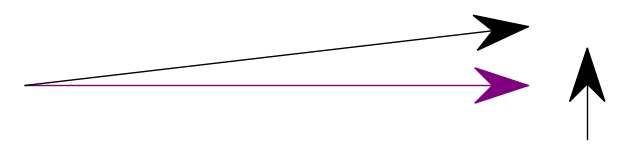

In [12]:
At = [5.4,3]
Ot = [-4,3]

At2 = [5.4,4.1]
Ot2 = [-4,3]

At3 = [6.5,3.7]
Ot3 = [6.5,2]


res1 = arrow_dyn2(Ot,At,1,0.33,'purple',zOrder=3)
res2 = arrow_dyn2(Ot2,At2,1,0.33,'black',zOrder=3)
res3 = arrow_dyn2(Ot3,At3,1,0.33,'black',zOrder=3)

show(res1+res2+res3)

## Asymmetric games with 2 players and 2 actions

### Functions

In [18]:
#Replicator dynamics for an asymmetric 2x2 game
def f(x,y,payMtx):
    return x*(1-x)*(x*(y*payMtx[0][0] + (1 - y)*payMtx[0][1]) - (1-x)*(y*payMtx[1][0] + (1 - y)*payMtx[1][1]));

In [69]:
#Function for generating a 3-strategy simplex with trajectories of the replicator dynamics given a payoff matrix payMtx
def numSdeSimplexA22(x0,y0,payMtx1,payMtx2,step,parr,Tmax,col,arrSize,arrWidth,zd):
    x,y=var('x,y');
    sol=desolve_odeint([f(x,y,payMtx1),f(y,x,payMtx2)],[x0,y0],srange(0,Tmax,step),[x,y]);
    solRev=desolve_odeint([-f(x,y,payMtx1),-f(y,x,payMtx2)],[x0,y0],srange(0,Tmax,step),[x,y]);
    
    solX=sol[:,0];
    solY=sol[:,1];
    solXrev=solRev[:,0];
    solYrev=solRev[:,1];
        
    psol=line(zip(solX,solY),color=col,aspect_ratio=1,zorder=zd);
    psolRev=line(zip(solXrev,solYrev),color=col,aspect_ratio=1,zorder=zd);

    dirs=arrow_dyn2(xStart=[solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]], xEnd=[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    #dirs=arrow([solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]],[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],width=1, arrowsize=arrSize,color=col,zorder=zd);

    dirsRev=arrow_dyn2(xStart=[solXrev[integer_floor(parr[0]*len(solXrev))],solYrev[integer_floor(parr[0]*len(solXrev))]], xEnd=[solXrev[integer_floor(parr[0]*len(solXrev))+1],solYrev[integer_floor(parr[0]*len(solXrev))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);

    for i in [1..(len(parr)-1)]:
        dirs = dirs+arrow_dyn2(xStart=[solX[integer_floor(parr[i]*len(solX))],solY[integer_floor(parr[i]*len(solX))]], xEnd=[solX[integer_floor(parr[i]*len(solX))+1],solY[integer_floor(parr[i]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
        dirsRev = dirs+arrow_dyn2([solXrev[integer_floor(parr[i]*len(solXrev))+1],solYrev[integer_floor(parr[i]*len(solXrev))+1]], [solXrev[integer_floor(parr[i]*len(solXrev))],solYrev[integer_floor(parr[i]*len(solXrev))]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    return(psol+psolRev+dirs)

In [85]:
#colSnk = Color of sinks on the plot
#colSdl = Color of saddles
#colSce = Color of sources
#ptSize = size of the equilibria on the plot
#zd = layer of the plot (see Sagemath documentation for details)
def eqShowCompGenA22(payMtx1,payMtx2,colSnk,colSdl,colSce,ptSize,xlab,ylab,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    #Compute equilibria of the replicator dynamics
    numEqsRaw = solve([f(x,y,payMtx1)==0, f(y,x,payMtx2)==0],x,y);
    
    #Check that all equilibria are within the simplex
    for i in range(len(numEqsRaw)):
        if (0 <=  numEqsRaw[i][0].rhs() <= 1 and 0 <=  numEqsRaw[i][1].rhs() <= 1):
            numEqs += [[numEqsRaw[i][0].rhs(),numEqsRaw[i][1].rhs()]];
    #Check that equilibria are real
    for i in range(len(numEqs)):
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    #Compute eigenvalues of Jacobian evaluated at each equilibrium
    for i in range(len(numEqs)):
            numEig += [jacobian([f(x,y,payMtx1), f(y,x,payMtx2)],(x,y))(x=numEqs[i][0],y=numEqs[i][1]).n().eigenvalues()];

    #Classify equilibria into sinks, saddles, sources, degenerate
    for i in range(len(numEqs)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [(numEqs[i][0],numEqs[i][1])];

                    
    #Plot equilibria    
    pSink = point(sink,color=colSnk,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd);
    pSource = point(source,color=colSce,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd);
    pSaddle = point(saddle,color=colSdl,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd);
    pUndet = point(undet,color='gray',faceted='True',markeredgecolor='black',size=ptSize,zorder=zd);

    return(pSink+pSource+pSaddle+pUndet)

### Tests

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:34: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


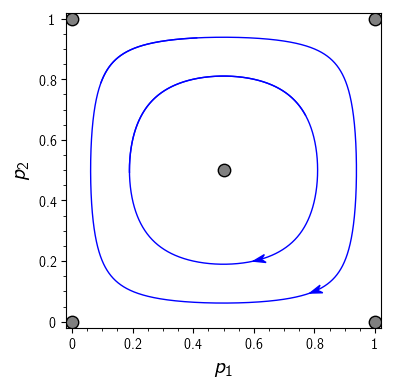

In [78]:
#Matching pennies
frameSim = plot(0,xmin=0,xmax=1,ymin=0,ymax=1,alpha=0,axes=False,frame=True,aspect_ratio=1,axes_labels=['$p_1$','$p_2$'])
payMtxS1 = [[1,-1],[-1,1]] #Payoff matrix for player 1
payMtxS2 = [[-1,1],[1,-1]] #Payoff matrix for player 2
eqsFrame = eqShowCompGenA22(payMtxS1,payMtxS2,'black','gray','white',80,'$p_1$','$p_2$',2);
traj1 = numSdeSimplexA22(0.6,0.2,payMtxS1,payMtxS2,0.01,[0.0001],10,'blue',1/25.0,1/75.0,20);
traj2 = numSdeSimplexA22(0.8,0.1,payMtxS1,payMtxS2,0.01,[0.01],10,'blue',1/25.0,1/75.0,20);
show(frameSim+eqsFrame+traj1+traj2)

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:34: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


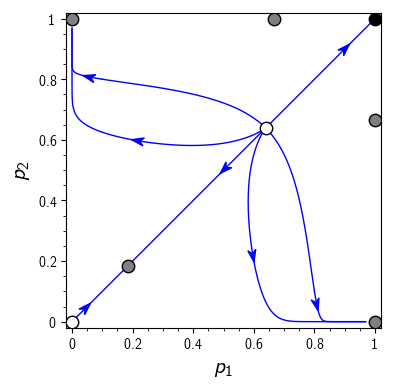

In [91]:
#Hawk-Dove with two populations
frameSim = plot(0,xmin=0,xmax=1,ymin=0,ymax=1,alpha=0,axes=False,frame=True,aspect_ratio=1,axes_labels=['$p_1$','$p_2$'])
payMtxS1 = [[2.5,0],[5,-1]] #Payoff matrix for player 1
payMtxS2 = [[2.5,0],[5,-1]] #Payoff matrix for player 2
eqs = eqShowCompGenA22(payMtxS1,payMtxS2,'black','gray','white',80,'$p_1$','$p_2$',30);
traj1 = numSdeSimplexA22(0.6,0.2,payMtxS1,payMtxS2,0.01,[0.0001],30,'blue',1/25.0,1/75.0,20);
traj2 = numSdeSimplexA22(0.8,0.1,payMtxS1,payMtxS2,0.01,[0.01],30,'blue',1/25.0,1/75.0,20);
traj3 = numSdeSimplexA22(0.5,0.5,payMtxS1,payMtxS2,0.01,[0.01],10,'blue',1/25.0,1/75.0,20);
traj4 = numSdeSimplexA22(0.9,0.9,payMtxS1,payMtxS2,0.01,[0.01],10,'blue',1/25.0,1/75.0,20);
traj5 = numSdeSimplexA22(0.2,0.6,payMtxS1,payMtxS2,0.01,[0.0001],30,'blue',1/25.0,1/75.0,20);
traj6 = numSdeSimplexA22(0.1,0.8,payMtxS1,payMtxS2,0.01,[0.01],30,'blue',1/25.0,1/75.0,20);
traj7 = numSdeSimplexA22(0.05,0.05,payMtxS1,payMtxS2,0.01,[0.01],30,'blue',1/25.0,1/75.0,20);


show(frameSim+eqs+traj1+traj2+traj3+traj4+traj5+traj6+traj7)

The above figure is not correct!! There should be two locally stable equilibria: $(0,1)$ and $(1,0)$. Check what's wrong in the code. Moreover the dynamics on the diagonal $x=y$ should look like the one-dimensional replicator dynamics (with only one interior equilibrium). The code below is a first exploration of what went wrong...

In [112]:
eqsHD1 = solve(f(x,x,[[2.5,0.0],[5.0,-1.0]])==0.0,x)
eqsHD1

[x == -1/17*sqrt(15) + 7/17, x == 1/17*sqrt(15) + 7/17, x == 0, x == 1]

In [107]:
eqsHD = solve([f(x,y,[[2.5,0.0],[5.0,-1.0]])==0.0, f(y,x,[[2.5,0.0],[5.0,-1.0]])==0.0],x,y);
eqsHD

[[x == 0, y == 0], [x == 1, y == 0], [x == 0, y == 1], [x == -1/17*sqrt(15) + 7/17, y == -1/17*sqrt(15) + 7/17], [x == 1/17*sqrt(15) + 7/17, y == 1/17*sqrt(15) + 7/17], [x == 1, y == (2/3)], [x == (2/3), y == 1], [x == 1, y == 1]]

In [109]:
[[eqsHD[3][0].rhs().n(),eqsHD[3][1].rhs().n()],[eqsHD[4][0].rhs().n(),eqsHD[4][1].rhs().n()]]


[[0.183942156105446, 0.183942156105446],
 [0.639587255659260, 0.639587255659260]]

In [115]:
numEigHD = [];
for i in range(len(eqsHD)):
    numEigHD += [jacobian([f(x,y,[[2.5,0.0],[5.0,-1.0]]), f(y,x,[[2.5,0.0],[5.0,-1.0]])],(x,y))(x=eqsHD[i][0],y=eqsHD[i][1]).eigenvalues()];
numEigHD


[[-1/2*((2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 72*x^3 - (2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 108*x^2 + 2*(378*x^3 - 481*x^2 + 148*x - 20)*y - 40*x)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x)],
 [-1/2*((2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 72*x^3 - (2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 108*x^2 + 2*(378*x^3 - 481*x^2 + 148*x - 20)*y - 40*x + 4)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x - 14)],
 [-1/2*((2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 72*x^3 - (2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 108*x^2 + 2*(378*x^3 - 481*x^2 + 148*x - 20)*y - 40*x + 4)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x - 14)],
 [-1/578*(83521*(2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 6013512*x^3 - 83521*(2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 9020268*x^2 + 167042*(378*x^3 - 481*x^2 + 148*x - 20)*y - 3340840*x + 63200*sqrt(15) + 235084)/(867*(17*x - 2)*y^2 - 1734*x^2 + 289*(51*x^2 - 116*x + 20)*y + 5780*x - 140*sqrt(15) - 516)],
 [-1/578*(83521*(2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 6013512*x^3 - 83521*(2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 9020268*x^2 + 167042*(378*x^3 - 481*x^2 + 148*x - 20)*y - 3340840*x - 63200*sqrt(15) + 235084)/(867*(17*x - 2)*y^2 - 1734*x^2 + 289*(51*x^2 - 116*x + 20)*y + 5780*x + 140*sqrt(15) - 516)],
 [-1/18*(9*(2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 648*x^3 - 9*(2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 972*x^2 + 18*(378*x^3 - 481*x^2 + 148*x - 20)*y - 360*x + 136)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x - 4)],
 [-1/18*(9*(2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 648*x^3 - 9*(2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 972*x^2 + 18*(378*x^3 - 481*x^2 + 148*x - 20)*y - 360*x + 136)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x - 4)],
 [-1/2*((2312*x^3 - 2771*x^2 + 756*x - 72)*y^3 - 72*x^3 - (2771*x^3 - 3375*x^2 + 962*x - 108)*y^2 + 108*x^2 + 2*(378*x^3 - 481*x^2 + 148*x - 20)*y - 40*x - 21)/(3*(17*x - 2)*y^2 - 6*x^2 + (51*x^2 - 116*x + 20)*y + 20*x - 14)]]

## Symmetric games with 2 players and 3 actions

### Functions

In [17]:
def setSimplex(strat1,strat2,strat3,fontSize,zd):
    bdr1=line([simToP(0,0), simToP(1,0)],color='black',aspect_ratio=1,axes=False,zorder=zd);
    bdr2=line([simToP(0,0), simToP(0,1)],color='black',axes=False,zorder=zd);
    bdr3=line([simToP(0,1), simToP(1,0)],color='black',axes=False,zorder=zd);
    lbl1=text(strat1, [simToP(0,0)[0]+0.032,simToP(0,0)[1]-0.022],fontsize=fontSize, color='black',axes=False,zorder=zd);
    lbl2=text(strat2, [simToP(1,0)[0],simToP(1,0)[1]+0.040],fontsize=fontSize, color='black',axes=False,zorder=zd);
    lbl3=text(strat3, [simToP(0,1)[0]-0.043,simToP(0,1)[1]-0.022],fontsize=fontSize, color='black',axes=False,zorder=zd);
    return(bdr1+bdr2+bdr3+lbl1+lbl2+lbl3)

In [19]:
#Function for plotting the speed of vector field within the boundaries of the simplex
bdrys(epsilon) = ((-(2*epsilon + sqrt(3))/(2*epsilon + 1))*x + (2*epsilon^2 + epsilon*(sqrt(3) + 2) + sqrt(3))/(2*epsilon + 1) - y)*(((2*epsilon + sqrt(3))/(2*epsilon + 1))*x + (2*epsilon^2 + sqrt(3)*epsilon)/(2*epsilon + 1) - y);

In [2]:
#Projecting the coordinates from the simplex to the plane
simToP(x,y)=(-(1/2)*x+1-y,(sqrt(3)/2)*x);
plToSim(x,y)=(2/3*sqrt(3)*y,-1/3*sqrt(3)*y - x + 1);

In [98]:
#The payoff matrix has three rows and three columns
#The payoff matrix must be named payMtxS whenever the function w3s is used
payMtxS = [[0,-2,1],[1,0,-2],[-2,1,0]]
w3s(x_1,x_2,y_1,y_2) = x_1*(y_1*payMtxS[0][0] + y_2*payMtxS[0][1] + (1-y_1-y_2)*payMtxS[0][2]) + x_2*(y_1*payMtxS[1][0] + y_2*payMtxS[1][1] + (1-y_1-y_2)*payMtxS[1][2]) + (1-x_1-x_2)*(y_1*payMtxS[2][0] + y_2*payMtxS[2][1] + (1-y_1-y_2)*payMtxS[2][2])

In [4]:
#The payoff matrix has three rows and three columns
def w3(x_1,x_2,y_1,y_2,payMtx):
    ePay = x_1*(y_1*payMtx[0][0] + y_2*payMtx[0][1] + (1-y_1-y_2)*payMtx[0][2]) + x_2*(y_1*payMtx[1][0] + y_2*payMtx[1][1] + (1-y_1-y_2)*payMtx[1][2]) + (1-x_1-x_2)*(y_1*payMtx[2][0] + y_2*payMtx[2][1] + (1-y_1-y_2)*payMtx[2][2])
    return ePay

In [75]:
def repDyn3(x_1,x_2,payMtx):
    return [x_1*(w3(1,0,x_1,x_2,payMtx) - w3(x_1,x_2,x_1,x_2,payMtx)), x_2*(w3(0,1,x_1,x_2,payMtx) - w3(x_1,x_2,x_1,x_2,payMtx))]

In [112]:
repDyn3s(x_1,x_2) = [x_1*(w3s(1,0,x_1,x_2) - w3s(x_1,x_2,x_1,x_2)), x_2*(w3s(0,1,x_1,x_2) - w3s(x_1,x_2,x_1,x_2))]

In [114]:
speedS(x_c,x_d) = norm(vector(repDyn3s(plToSim(x_c,x_d)[0],plToSim(x_c,x_d)[1])))

In [115]:
#Function for generating a 3-strategy simplex with trajectories of the replicator dynamics given a payoff matrix payMtx
def numSdeSimplexGen3(x0,y0,payMtx,step,parr,Tmax,col,arrSize,arrWidth,zd):
    x,y=var('x,y');
    sol=desolve_odeint(repDyn3(x,y,payMtx),[x0,y0],srange(0,Tmax,step),[x,y]);
    solRev=desolve_odeint(-vector(repDyn3(x,y,payMtx)),[x0,y0],srange(0,Tmax,step),[x,y]);
    
    solX=[];
    solY=[];
    solXrev=[];
    solYrev=[];
    for i in sol:
        cPt = simToP(i[0],i[1]);
        solX += [N(cPt[0])];
        solY += [N(cPt[1])];
    for i in solRev:
        cPt = simToP(i[0],i[1]);
        solXrev += [N(cPt[0])];
        solYrev += [N(cPt[1])];

    psol=line(zip(solX,solY),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);
    psolRev=line(zip(solXrev,solYrev),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);

    dirs=arrow_dyn2(xStart=[solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]], xEnd=[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    #dirs=arrow([solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]],[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],width=1, arrowsize=arrSize,color=col,zorder=zd);

    dirsRev=arrow_dyn2(xStart=[solXrev[integer_floor(parr[0]*len(solXrev))],solYrev[integer_floor(parr[0]*len(solXrev))]], xEnd=[solXrev[integer_floor(parr[0]*len(solXrev))+1],solYrev[integer_floor(parr[0]*len(solXrev))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    
    

    for i in [1..(len(parr)-1)]:
        dirs = dirs+arrow_dyn2(xStart=[solX[integer_floor(parr[i]*len(solX))],solY[integer_floor(parr[i]*len(solX))]], xEnd=[solX[integer_floor(parr[i]*len(solX))+1],solY[integer_floor(parr[i]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
        dirsRev = dirs+arrow_dyn2([solXrev[integer_floor(parr[i]*len(solXrev))+1],solYrev[integer_floor(parr[i]*len(solXrev))+1]], [solXrev[integer_floor(parr[i]*len(solXrev))],solYrev[integer_floor(parr[i]*len(solXrev))]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    return(psol+psolRev+dirs)

In [116]:
#colSnk = Color of sinks on the plot
#colSdl = Color of saddles
#colSce = Color of sources
#ptSize = size of the equilibria on the plot
#zd = layer of the plot (see Sagemath documentation for details)
def eqShowCompGen(payMtx,colSnk,colSdl,colSce,ptSize,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    #Compute equilibria of the replicator dynamics
    nuEqsRaw = solve([repDyn3(x,y,payMtx)[0]==0, repDyn3(x,y,payMtx)[1]==0,sum(repDyn3(x,y,payMtx))==0],x,y);
    
    #Check that all equilibria are within the simplex
    for i in range(len(nuEqsRaw)):
        if (0 <=  nuEqsRaw[i][0].rhs() <= 1 and 0 <=  nuEqsRaw[i][1].rhs() <= 1 and nuEqsRaw[i][0].rhs() + nuEqsRaw[i][1].rhs() <= 1):
            numEqs += [[nuEqsRaw[i][0].rhs(),nuEqsRaw[i][1].rhs()]];
    #Check that equilibria are real
    for i in range(len(numEqs)):
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    #Compute eigenvalues of Jacobian evaluated at each equilibrium
    for i in range(len(numEqs)):
            numEig += [jacobian(repDyn3(x,y,payMtx),(x,y))(x=numEqs[i][0],y=numEqs[i][1]).n().eigenvalues()]; #j3 is the name of the Jacobian matrix, defined above in the notebook

    #Classify equilibria into sinks, saddles, sources, degenerate
    for i in range(len(numEqs)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    #Plot equilibria
    pSink = point(sink,color=colSnk,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSource = point(source,color=colSce,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSaddle = point(saddle,color=colSdl,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pUndet = point(undet,color='gray',faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);

    return(pSink+pSource+pSaddle+pUndet)

### Tests

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:34: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


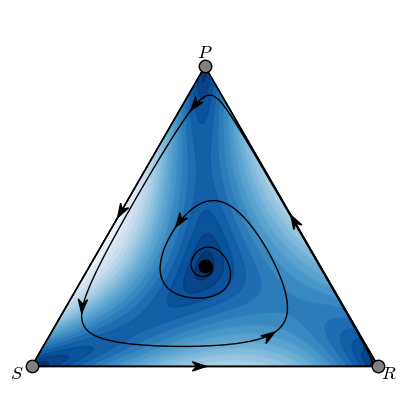

In [118]:
#Good Rock-Paper-Scissors game
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize
pMrps = [[0,-1,2],[2,0,-1],[-1,2,0]]
payMtxS = pMrps

fSim=setSimplex("$R$","$P$","$S$",13,53);
traj1=numSdeSimplexGen3(0.9,0.05,pMrps,0.01,[0.01,0.06,0.12,0.2],50,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplexGen3(0.5,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplexGen3(0,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0.5,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
csp = contour_plot(speedS(x,y), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowCompGen(pMrps,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+stbEqs+csp+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:34: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


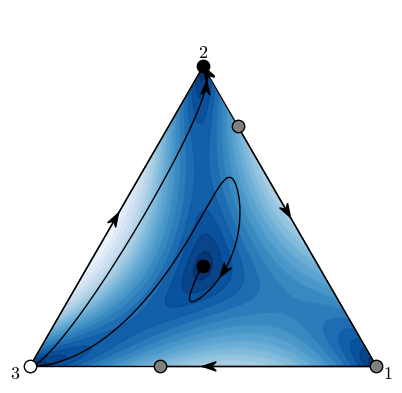

In [111]:
#Strange example from Fig. 6.12 in Bomze (1983, p. 207)
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize
pMrps = [[0,6,-4],[-3,0,5],[-1,3,0]]
payMtxS = pMrps


fSim=setSimplex("$1$","$2$","$3$",13,53);
traj1=numSdeSimplexGen3(0.9,0.05,pMrps,0.01,[0.01,0.06,0.12,0.2],50,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplexGen3(0.5,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplexGen3(0,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0.5,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplexGen3(0.3,0.3,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
csp = contour_plot(speedS(x,y), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowCompGen(pMrps,'black','gray','white',80,54);
show(fSim+stbEqs+traj1+traj2+traj3+traj4+traj5+csp+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")